### Plots for the paper Persistent Topological Features in Large Language Models

In [14]:
import numpy as np 
import pandas as pd
import csv
import post_process
from post_process import POSTPROCESS
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec


In [2]:
def p_column_knn(betti,ph_sim_betti):
    n_layers = len(betti)
    assert n_layers == int(ph_sim_betti.shape[0])
    tmp = np.zeros((n_layers,n_layers))
    for i in range(n_layers):
        for j in range(n_layers):
            tmp[i][j] = ph_sim_betti[i,j]/betti[j]
    
    res = np.mean(tmp,axis=1)
    return res

In [3]:

hex6 = ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000']
colors6=[mcolors.to_rgb(i) for i in hex6]

colors = ['white', colors6[0]]
positions = [0, 1]
cmap0 = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

colors = ['white', colors6[4]]
positions = [0, 1]
cmap1 = mcolors.LinearSegmentedColormap.from_list("", list(zip(positions, colors)))

## Figure 2 

No points in hom_dim = 3
(5, 67, 67)


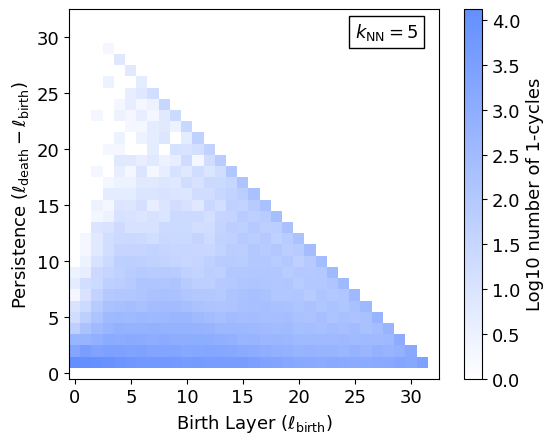

In [4]:
model = './csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv'
num_layers = 33 

pds = post_process.read_pd_from_csv(model, max_dim = 5)
pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
pis = pp.find_eff_pis()[1]
bettis = pp.find_betti_layers()[1]
import warnings
warnings.filterwarnings('ignore')
pis_pers = np.zeros((len(pis),num_layers,num_layers))
for i in range(num_layers):
    for j in range(num_layers):
        if i-j>=0:
            #pis_pers[:,i-j,j] = np.mean([pis_dict[select_model][num_knn[k]][:,i,j] for k in range(len(num_knn))],axis=0)
            pis_pers[:,i-j,j] = pis[i,j]


plt.imshow(np.log10(pis_pers[1]), cmap=cmap0, origin='lower')
cb = plt.colorbar()
cb.set_label('Log10 number of 1-cycles',fontsize=13)
cb.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Birth Layer $(\\ell_{\\rm birth})$',fontsize=13)
plt.ylabel('Persistence $(\\ell_{\\rm death} - \\ell_{\\rm birth})$',fontsize=13)
plt.text(25,30,'$k_{\\rm NN} = 5$',fontsize=13,bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.show()

(5, 67, 67)


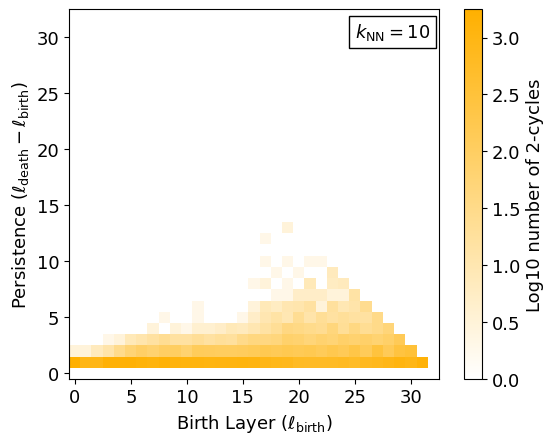

In [5]:
model = './csv/sst/llama_3_8b_dim_4_knn_10_last_token.csv'
num_layers = 33 

pds = post_process.read_pd_from_csv(model, max_dim = 5)
pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
pis = pp.find_eff_pis()[2]
bettis = pp.find_betti_layers()[2]
pis_pers = np.zeros((len(pis),num_layers,num_layers))
for i in range(num_layers):
    for j in range(num_layers):
        if i-j>=0:
            pis_pers[:,i-j,j] = pis[i,j]


plt.imshow(np.log10(pis_pers[1]), cmap=cmap1, origin='lower')
cb = plt.colorbar()
cb.set_label('Log10 number of 2-cycles',fontsize=13)
cb.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Birth Layer $(\\ell_{\\rm birth})$',fontsize=13)
plt.ylabel('Persistence $(\\ell_{\\rm death} - \\ell_{\\rm birth})$',fontsize=13)
plt.text(25,30,'$k_{\\rm NN} = 10$',fontsize=13,bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.show()

## Figure 3 of the paper

### Llama3 8B

No points in hom_dim = 3
(5, 67, 67)


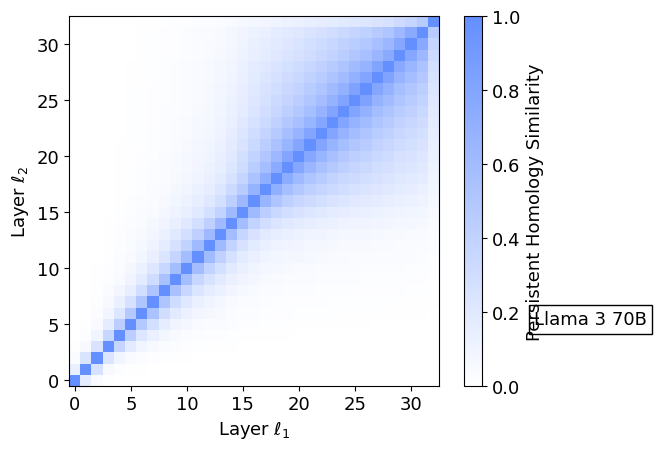

In [6]:
def similarity(model,num_layers,p=1):

    pds = post_process.read_pd_from_csv(model, max_dim = 5)
    pp = POSTPROCESS(pds = pds, num_layers = num_layers*2, start_ind = 1, zigzag = True, debug = False)
    psim = pp.find_ph_sim()[p]
    bettis = pp.find_betti_layers()[p]
    temp = np.zeros((num_layers,num_layers))
    for i in range(num_layers):
        temp[i] = psim[i]/bettis[i]
    return temp

path = "./csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv"
num_layers=33 #32 + model.norm

temp = similarity(path,num_layers)



plt.imshow(temp, cmap=cmap0, origin='lower')
cb = plt.colorbar()
cb.set_label('Persistent Homology Similarity',fontsize=13)
cb.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Layer $\\ell_1$',fontsize=13)
plt.ylabel('Layer $\\ell_2$',fontsize=13)
plt.text(41, 5, 'Llama 3 70B', fontsize=13, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.show()


### Llama 3 70B

No points in hom_dim = 3
(5, 163, 163)


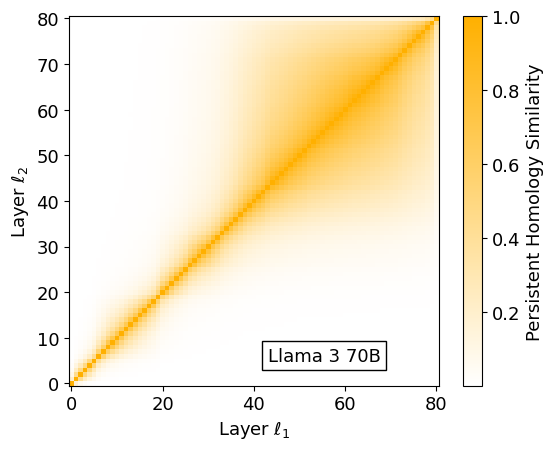

In [7]:
path = "./csv/sst/llama_3_70b_dim_4_knn_5_last_token.csv"
num_layers=81 #80 + model.norm

temp = similarity(path,num_layers)
plt.imshow(temp, cmap=cmap1, origin='lower')
cb = plt.colorbar()
cb.set_label('Persistent Homology Similarity',fontsize=13)
cb.ax.tick_params(labelsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Layer $\\ell_1$',fontsize=13)
plt.ylabel('Layer $\\ell_2$',fontsize=13)
plt.text(43, 5, 'Llama 3 70B', fontsize=13, bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.show()

### Figure 4

In [8]:
cb_palette= ['#648FFF', '#785EF0', '#DC267F', '#FE6100', '#FFB000','#3CAB20','#6B750C']

In [9]:
models_sst = {'Llama 2 7B':['./csv/sst/llama_2_7b_dim_4_knn_5_last_token.csv',66,cb_palette[0]],
          'Llama 2 13B': ['./csv/sst/llama_2_13b_dim_4_knn_5_last_token.csv',82,cb_palette[1]],
          'Llama 2 70B': ['./csv/sst/llama_2_70b_dim_4_knn_5_last_token.csv',162,cb_palette[2]],
          'Llama 3 8B': ['./csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv',66,cb_palette[3]],
          'Llama 3 70B':['./csv/sst/llama_3_70b_dim_4_knn_5_last_token.csv',162,cb_palette[4]],
          'Mistral 7B':['./csv/sst/mistral_sst_knn_5_dim_4.csv',66,cb_palette[5]],
          'Pythia 6.9B':['./csv/sst/pythia6_9_deduped_knn_5_dim_4.csv',66,cb_palette[6]]}

['./csv/sst/llama_2_7b_dim_4_knn_5_last_token.csv', 66, '#648FFF']
No points in hom_dim = 3
(5, 67, 67)
33
['./csv/sst/llama_2_13b_dim_4_knn_5_last_token.csv', 82, '#785EF0']
No points in hom_dim = 3
(5, 83, 83)
41
['./csv/sst/llama_2_70b_dim_4_knn_5_last_token.csv', 162, '#DC267F']
No points in hom_dim = 3
(5, 163, 163)
81
['./csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv', 66, '#FE6100']
No points in hom_dim = 3
(5, 67, 67)
33
['./csv/sst/llama_3_70b_dim_4_knn_5_last_token.csv', 162, '#FFB000']
No points in hom_dim = 3
(5, 163, 163)
81
['./csv/sst/mistral_sst_knn_5_dim_4.csv', 66, '#3CAB20']
No points in hom_dim = 3
(5, 67, 67)
33
['./csv/sst/pythia6_9_deduped_knn_5_dim_4.csv', 66, '#6B750C']
No points in hom_dim = 3
(5, 67, 67)
33


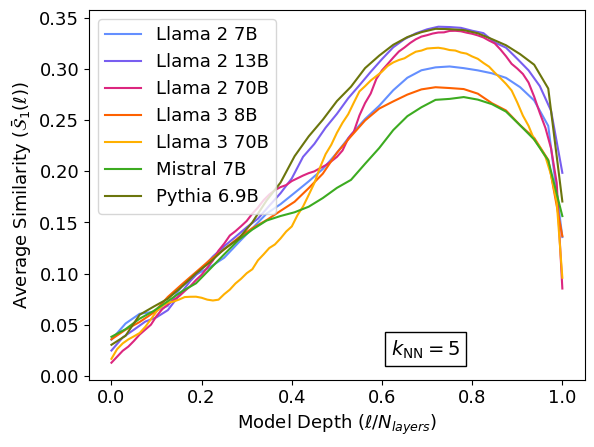

In [10]:
for key in models_sst.keys():
    print(models_sst[key])
    pds = post_process.read_pd_from_csv(models_sst[key][0], max_dim = 5)
    pp = POSTPROCESS(pds = pds, num_layers = models_sst[key][1], start_ind = 1, zigzag = True, debug = False)
    phsim_betti_1 = pp.find_ph_sim()[1]
    betti_1 = pp.find_betti_layers()[1]
    r = p_column_knn(betti_1,phsim_betti_1)
    print(len(r))
    x = np.linspace(0, 1, len(r))
    plt.plot(x,r,label=key,c=models_sst[key][2])
plt.legend()
plt.text(0.62, 0.02, '$k_{\\rm NN} = 5$', fontsize=14,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.xlabel("Model Depth ($\\ell$/$N_{layers}$)",fontsize=13)
plt.ylabel("Average Similarity ($\\bar{\\mathcal{S}}_1(\\ell)$)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

In [11]:
models_llama3 = {'$k_{\\rm NN} = 2$':['./csv/sst/llama_3_8b_dim_4_knn_2_last_token.csv',66,cb_palette[0]],
          '$k_{\\rm NN} = 5$': ['./csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv',82,cb_palette[1]],
          '$k_{\\rm NN} = 8$': ['./csv/sst/llama_3_8b_dim_4_knn_8_last_token.csv',162,cb_palette[2]],
          '$k_{\\rm NN} = 11$': ['./csv/sst/llama_3_8b_dim_4_knn_11_last_token.csv',66,cb_palette[3]],
          '$k_{\\rm NN} = 15$':['./csv/sst/llama_3_8b_dim_4_knn_15_last_token.csv',162,cb_palette[4]]}

['./csv/sst/llama_3_8b_dim_4_knn_2_last_token.csv', 66, '#648FFF']
No points in hom_dim = 2
No points in hom_dim = 3
No points in hom_dim = 4
(5, 67, 67)
['./csv/sst/llama_3_8b_dim_4_knn_5_last_token.csv', 82, '#785EF0']
No points in hom_dim = 3
(5, 67, 67)
['./csv/sst/llama_3_8b_dim_4_knn_8_last_token.csv', 162, '#DC267F']
(5, 67, 67)
['./csv/sst/llama_3_8b_dim_4_knn_11_last_token.csv', 66, '#FE6100']
(5, 67, 67)
['./csv/sst/llama_3_8b_dim_4_knn_15_last_token.csv', 162, '#FFB000']
(5, 67, 67)


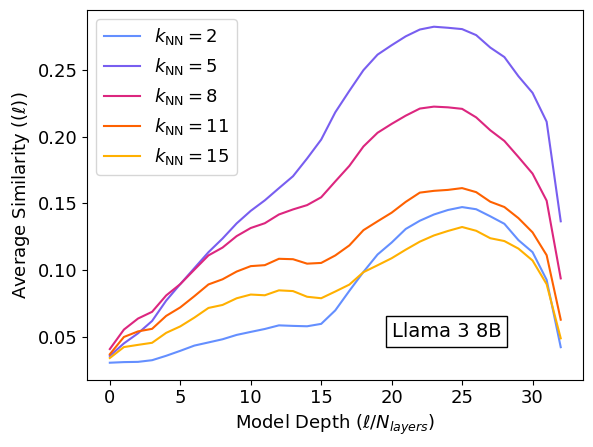

In [12]:
for key in models_llama3.keys():
    print(models_llama3[key])
    pds = post_process.read_pd_from_csv(models_llama3[key][0], max_dim = 5)
    pp = POSTPROCESS(pds = pds, num_layers = 66, start_ind = 1, zigzag = True, debug = False)
    phsim_betti_1 = pp.find_ph_sim()[1]
    betti_1 = pp.find_betti_layers()[1]
    r = p_column_knn(betti_1,phsim_betti_1)

    plt.plot(r,label=key,c=models_llama3[key][2])
plt.legend()
plt.text(20, 0.05, 'Llama 3 8B', fontsize=14,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='square'))
plt.xlabel("Model Depth ($\\ell$/$N_{layers}$)",fontsize=13)
plt.ylabel("Average Similarity ($(\\ell)$)",fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)

## Figure 5

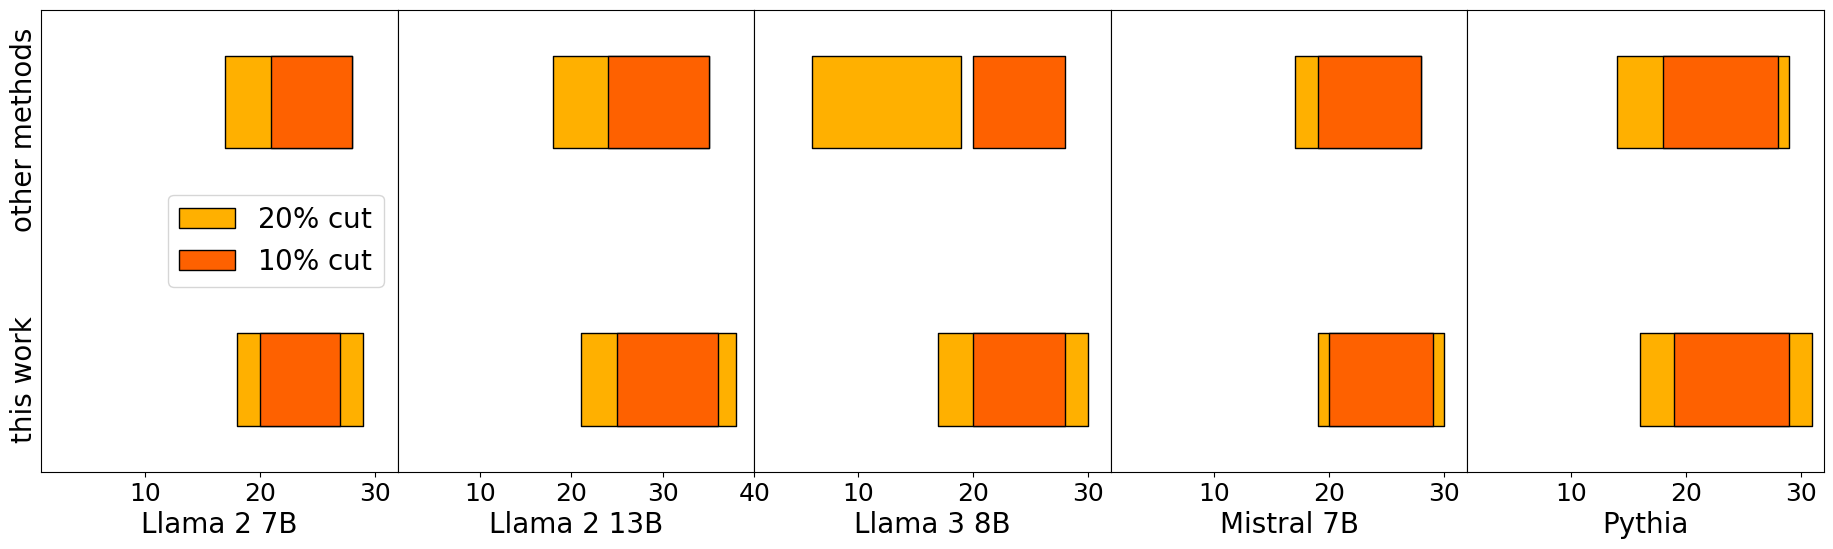

In [15]:
import matplotlib.gridspec as gridspec

# Define the range for the colored band

# Create a plot with two subplots side by side
fig = plt.figure(figsize=(23, 6))
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1], wspace=0)

# First subplot
ax1 = plt.subplot(gs[0])

# Example plot data
x1 = np.linspace(20, 27, 30)
xi = 0.25
xf = 0.75
x2 = np.linspace(18, 29, 30)

y1 = np.linspace(21, 28, 30)
yi = 1.75
yf = 2.25
y2 = np.linspace(17, 28, 30)

# Plot the data
ax1.fill_between(x2, xi, xf, color=colors6[4], alpha=1.0, label='$20\%$ cut', edgecolor='black', linewidth=1)
ax1.fill_between(x1, xi, xf, color=colors6[3], alpha=1.0, label='$10\%$ cut', edgecolor='black', linewidth=1)

ax1.fill_between(y2, yi, yf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax1.fill_between(y1, yi, yf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)


num_layers = 32
# Add labels and title
ax1.set_xlabel('Llama 2 7B',fontsize=20)
ax1.set_xlim([1, num_layers])
ax1.set_ylim([0, 2.5])
ax1.legend(fontsize=20)

# Remove y-ticks and labels
ax1.set_yticks([])
ax1.set_ylabel('')

# Add text along the y-axis
ax1.text(-0.5, 0.5, 'this work', rotation=90, va='center', ha='center',fontsize=20)
ax1.text(-0.5, 1.85, 'other methods', rotation=90, va='center', ha='center',fontsize=20)

########################################################################################
# Second subplot (identical to the first)
ax2 = plt.subplot(gs[1], sharey=ax1)

num_layers = 40

# Example plot data
x1 = np.linspace(25, 36, 30)
x2 = np.linspace(21, 38, 30)

y1 = np.linspace(24, 35, 30)
y2 = np.linspace(18, 35, 30)

# Plot the data
ax2.fill_between(x2, xi, xf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax2.fill_between(x1, xi, xf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)

ax2.fill_between(y2, yi, yf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax2.fill_between(y1, yi, yf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)


# Add labels and title
ax2.set_xlabel('Llama 2 13B',fontsize=20)
ax2.set_xlim([1, num_layers])
ax2.set_ylim([0, 2.5])

# Remove y-ticks and labels
ax2.set_yticks([])
ax2.set_ylabel('')


########################################################################################
# Third subplot (identical to the first)
ax3 = plt.subplot(gs[2], sharey=ax2)

num_layers = 32

# Example plot data
x1 = np.linspace(20, 28, 30)
x2 = np.linspace(17, 30, 30)

y1 = np.linspace(20, 28, 30)
y2 = np.linspace(6, 19, 30)

# Plot the data
ax3.fill_between(x2, xi, xf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax3.fill_between(x1, xi, xf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)

ax3.fill_between(y2, yi, yf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax3.fill_between(y1, yi, yf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)


# Add labels and title
ax3.set_xlabel('Llama 3 8B',fontsize=20)
ax3.set_xlim([1, num_layers])
ax3.set_ylim([0, 2.5])

# Remove y-ticks and labels
ax3.set_yticks([])
ax3.set_ylabel('')


########################################################################################
# Fourth subplot (identical to the first)
ax4 = plt.subplot(gs[3], sharey=ax3)

num_layers = 32

# Example plot data
x1 = np.linspace(20, 29, 30)
x2 = np.linspace(19, 30, 30)

y1 = np.linspace(19, 28, 30)
y2 = np.linspace(17, 28, 30)

# Plot the data
ax4.fill_between(x2, xi, xf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax4.fill_between(x1, xi, xf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)

ax4.fill_between(y2, yi, yf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax4.fill_between(y1, yi, yf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)


# Add labels and title
ax4.set_xlabel('Mistral 7B',fontsize=20)
ax4.set_xlim([1, num_layers])
ax4.set_ylim([0, 2.5])

# Remove y-ticks and labels
ax4.set_yticks([])
ax4.set_ylabel('')


########################################################################################
# Fifth subplot (identical to the first)
ax5 = plt.subplot(gs[4], sharey=ax4)

num_layers = 32

# Example plot data
x1 = np.linspace(19, 29, 30)
x2 = np.linspace(16, 31, 30)

y1 = np.linspace(18, 28, 30)
y2 = np.linspace(14, 29, 30)

# Plot the data
ax5.fill_between(x2, xi, xf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax5.fill_between(x1, xi, xf, color=colors6[3], alpha=1.0, label='This work' , edgecolor='black', linewidth=1)


ax5.fill_between(y2, yi, yf, color=colors6[4], alpha=1.0, edgecolor='black', linewidth=1)
ax5.fill_between(y1, yi, yf, color=colors6[3], alpha=1.0, edgecolor='black', linewidth=1)


# Add labels and title
ax5.set_xlabel('Pythia',fontsize=20)
ax5.set_xlim([1, num_layers])
ax5.set_ylim([0, 2.5])
# BEGIN: Set xticks sizes to 20
for ax in [ax1, ax2, ax3, ax4, ax5]:
    ax.tick_params(axis='x', labelsize=18)
# END: Set xticks sizes to 20

# Remove y-ticks and labels
ax5.set_yticks([])
ax5.set_ylabel('')

# Show the plot
plt.show()